<a href="https://colab.research.google.com/github/pawarharshit/tensorflow_programs/blob/master/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

In [25]:
train_dataset

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [27]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [0]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples

In [0]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images = images/255.0
    return images,labels


train_dataset =train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_datset = test_dataset.cache()

In [30]:
train_dataset

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

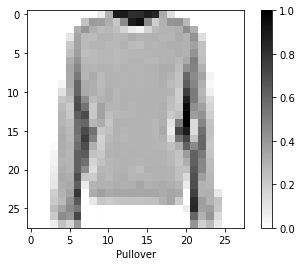

In [33]:
for image,label in train_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[label])
plt.show()

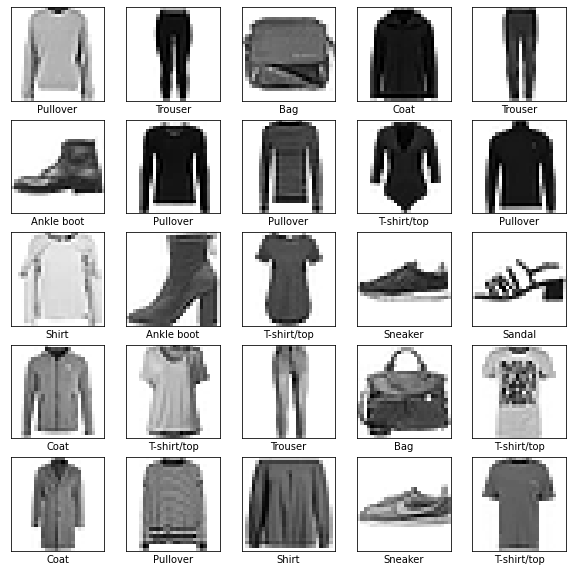

In [39]:
plt.figure(figsize = (10,10))
i=0
for image,label in train_dataset.take(25):
    plt.subplot(5,5,i+1)
    image = image.numpy().reshape((28,28))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [41]:
model = keras.Sequential([
                keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
                keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
                keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
                keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
                keras.layers.Flatten(),
                keras.layers.Dense(128,activation=tf.nn.relu),
                keras.layers.Dropout(0.2),
                keras.layers.Dense(128,activation=tf.nn.relu),
                keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [0]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)


In [45]:
train_dataset

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [50]:
import math
history=model.fit(train_dataset,epochs=15,steps_per_epoch=math.ceil(num_train/batch_size))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4533 - accuracy: 0.8331
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.8934
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2534 - accuracy: 0.9060
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2190 - accuracy: 0.9184
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1956 - accuracy: 0.9279
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1793 - accuracy: 0.9342
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1587 - accuracy: 0.9408
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1468 - accuracy: 0.9443
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1362 - accuracy: 0.9492
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.120

In [52]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test/batch_size))

313/313 [==============================] - 2s 7ms/step - loss: 0.3054 - accuracy: 0.9222


In [53]:
test_accuracy

0.9222000241279602

In [0]:
for test_image,test_label in test_dataset.take(1):
    test_image = test_image.numpy()
    test_label = test_label.numpy()
    test_predict = model.predict(test_image)

In [56]:
test_predict[0]

array([3.3843521e-09, 1.4629740e-08, 3.4487606e-05, 2.7549104e-08,
       9.7409385e-01, 4.1630938e-13, 2.5871702e-02, 2.9384134e-13,
       5.3412288e-09, 2.5665353e-13], dtype=float32)

In [58]:
print(np.argmax(test_predict[0]))
class_names[np.argmax(test_predict[0])]


4


'Coat'

In [61]:
test_image.shape

(32, 28, 28, 1)

In [0]:
def plot_image(i,predictions_array,true_labels,images):
    predictions_array = predictions_array[i]
    true_label = true_labels[i]
    img = images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label  = np.argmax(predictions_array)
    if(predicted_label == true_label):
        color='blue'
    else:
        color='red'

    plt.xlabel(f'{class_names[predicted_label]},{100*np.max(predictions_array)},{class_names[true_label]}',color=color)


def plot_value_array(i,predictions_array,true_label):
    predictions_array = predictions_array[i]
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

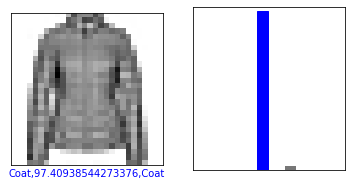

In [67]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_predict, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, test_predict, test_label)

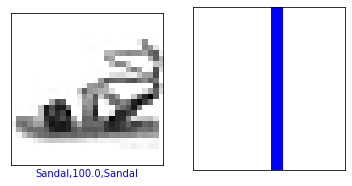

In [72]:
i=31
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, test_predict, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, test_predict, test_label)

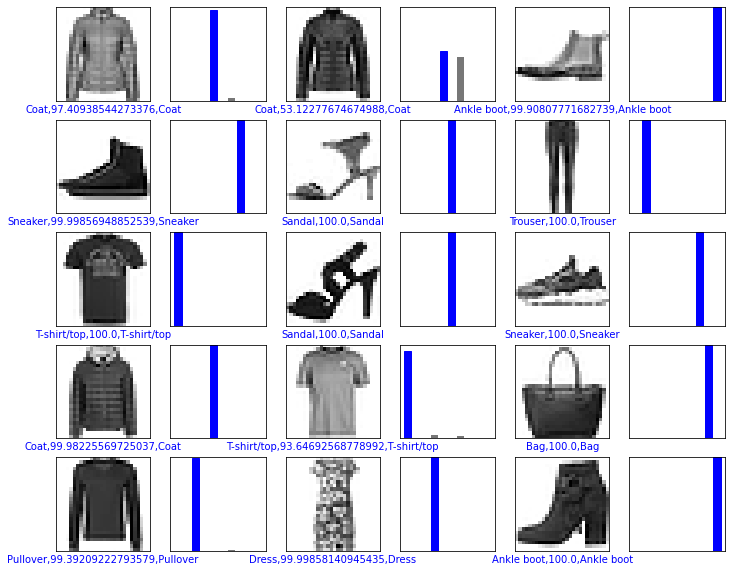

In [75]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, test_predict, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, test_predict, test_label)


In [77]:
img = test_image[0]

print(img.shape)

(28, 28, 1)


In [78]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [79]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.3843466e-09 1.4629771e-08 3.4487748e-05 2.7548953e-08 9.7409409e-01
  4.1631344e-13 2.5871472e-02 2.9384367e-13 5.3412190e-09 2.5665602e-13]]


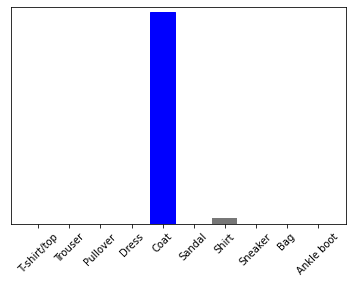

In [81]:
plot_value_array(0, predictions_single, test_label)
_ = plt.xticks(range(10), class_names, rotation=45)

In [82]:
np.argmax(predictions_single[0])

4